In [2]:
# Program 08b: The Lorenz attractor. See Figure 8.11.
# In this case, the odeint numerical solver was used to solve the ODE.
#%%

%matplotlib widget
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [6]:
import time


# Lorenz paramters and initial conditions
sigma, beta, rho = 10, 2.667, 28
x0, y0, z0 = 0, 1, .05
rho=28
x0, y0, z0 = 0, 1, 1
# Maximum time point and total number of time points
tmax, n = 100, 10000

def Lorenz(X, t, sigma, beta, rho):
    """The Lorenz equations"""
    x, y, z = X
    dx = -sigma * (x - y)
    dy = rho*x - y - x*z
    dz = -beta*z + x*y
    return (dx, dy, dz)
#%%
start_time = time.time()
start_cpu_time = time.process_time()
# Integrate the Lorenz equations on the time grid t.
t = np.linspace(0, tmax, n)
f = odeint(Lorenz, (x0, y0, z0), t, args=(sigma, beta, rho))
print("Wall--- %s seconds ---" % (time.time() - start_time))
print("CPU --- %s seconds ---" % (time.process_time() - start_cpu_time))
x, y, z = f.T
f1 = odeint(Lorenz, (x0, y0, z0-0.01), t, args=(sigma, beta, rho))
x1, y1, z1 = f1.T


Wall--- 0.08057308197021484 seconds ---
CPU --- 0.0651240000000004 seconds ---


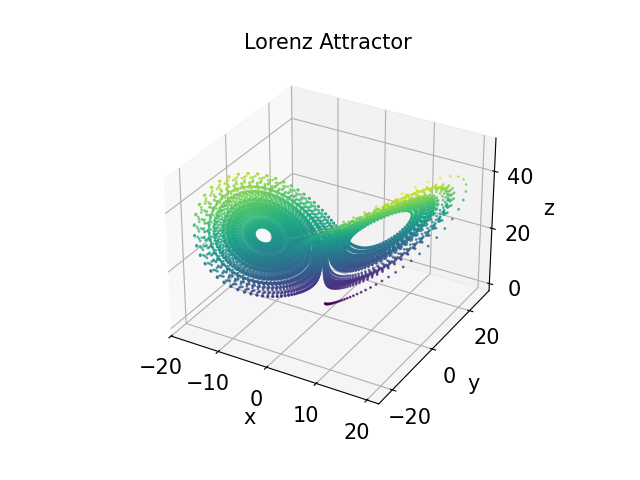

In [44]:

# Plot the Lorenz attractor using a Matplotlib 3D projection.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Color the points by their z value
colors = z / max(z)
ax.scatter(x, y, z, c=colors, cmap='viridis', marker='o', s=1, alpha=0.7)
#ax.plot(x, y, z, 'b-', lw=0.5, alpha=0.5)
#ax.plot(x1, y1, z1, 'r.', lw=0.5, alpha=0.1)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_zlabel('z', fontsize=15)
plt.tick_params(labelsize=15)
ax.set_title('Lorenz Attractor', fontsize=15)

plt.show()

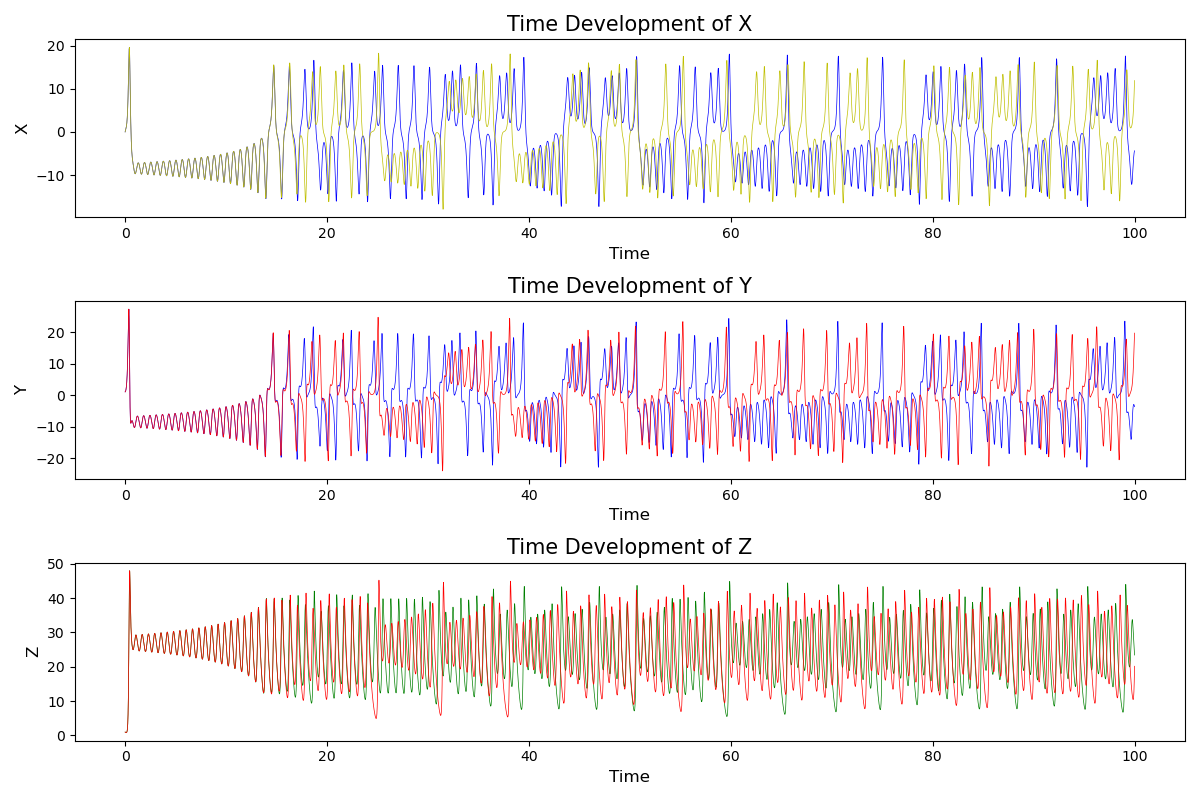

In [45]:
# Plot the time development of the three variables
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, x, 'b-', lw=0.5)
plt.plot(t, x1, 'y-', lw=0.5)
plt.xlabel('Time', fontsize=12)
plt.ylabel('X', fontsize=12)
plt.title('Time Development of X', fontsize=15)

plt.subplot(3, 1, 2)
plt.plot(t, y, 'b-', lw=0.5)
plt.plot(t, y1, 'r', lw=0.5)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('Time Development of Y', fontsize=15)

plt.subplot(3, 1, 3)
plt.plot(t, z, 'g-', lw=0.5)
plt.plot(t, z1, 'r-', lw=0.5)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Z', fontsize=12)
plt.title('Time Development of Z', fontsize=15)

plt.tight_layout()
plt.show()